<a href="https://colab.research.google.com/github/LiamJHowarth/IA-Sentinel/blob/main/Calibrating_a_Enterprise_Grade_Data_Pipeline_to_Predict_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Churn - Micro-Py Project

Thanks for tuning in to this Google Colab micro project!

Why would one care about calibration of a churn model? Firstly, we should note that humans are complex. Behavioural processes can be seen as stochastic when monitored independently from context.

As we introduce enterprise context, such as core and sub domains, the validity of the features ($X$) used to train the primary ML model (XGBoost, etc.) become critical business data. To be able to predict anything, we must have some past-looking references that coverge over time *(t)* we can start to draw upon enterprise associcated data inputs, so our model can rank customers effectively.



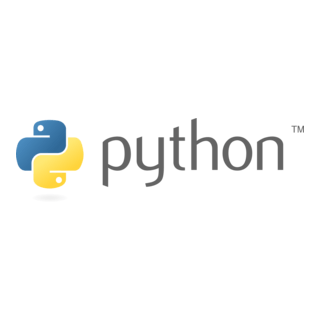

**Before we dive in**, it is good to set the enterprise context and pipeline activities that led us to calibration. For this example, the enterprise has 3 data sources in which we need to extract data from.



1. **Salesforce** (CRM)
2. **Azure Blob Storage** (Application Logs)
3. **Stripe** (Payments)



# Extract Data from Disparate Sources

The commmon pipeline challenge is acquisition of data. Here are some unique methods used to extract data from each systems.

Extracting raw data (logs, billing, CRM records) is transformed into the structured feature tables to understand the data in scope.


**Salesforce (CRM)**

> Salesforce offers Experience Cloud APIs which expose targeted data via bespoke endpoints. Orchestration using Azure Data Factory (ADF)'s Web Activity facilitates an efficient, event-driven extract mechanism, prioritising low latency over traditional bulk ETL If we are using an application such as Azure Data Factory to manage the orchestration, we can set up a web flow that is able send an HTTP request and await a response in a structured format such as JSON.

**Azure Blob Storage (Application Logs)**

> The primary activity is the Change Data Capture (CDC). As Azure Blob Storage consumes the logs, we can enable a patttern to perform micro extracting on the data, with a focus on idempotency and ensuring the data is recieved in compressed JSON for efficient delivery. The key parameters are the dynamic, date-partitioned file path and the LastModifiedTime filter to ensure incremental extraction of newly written log files.

**Stripe Payment Gateway**


> Typically SaaS have REST endpoints in which clients can connect to. Extraction from third-party SaaS providers is governed by the vendor's API design, which typically employs rate limiting and pagination mechanisms. In this instance, as we are using Azure Data Factory, we can connect via a Web Activity and Copy Data to GET. In the request, we can specify the limit: (e.g., 100) controls page size and filters records created greater than or equal to the last sync time for incremental loading. We can also specifiy starting_after which is used for pagination to sequentially request the next page of results.








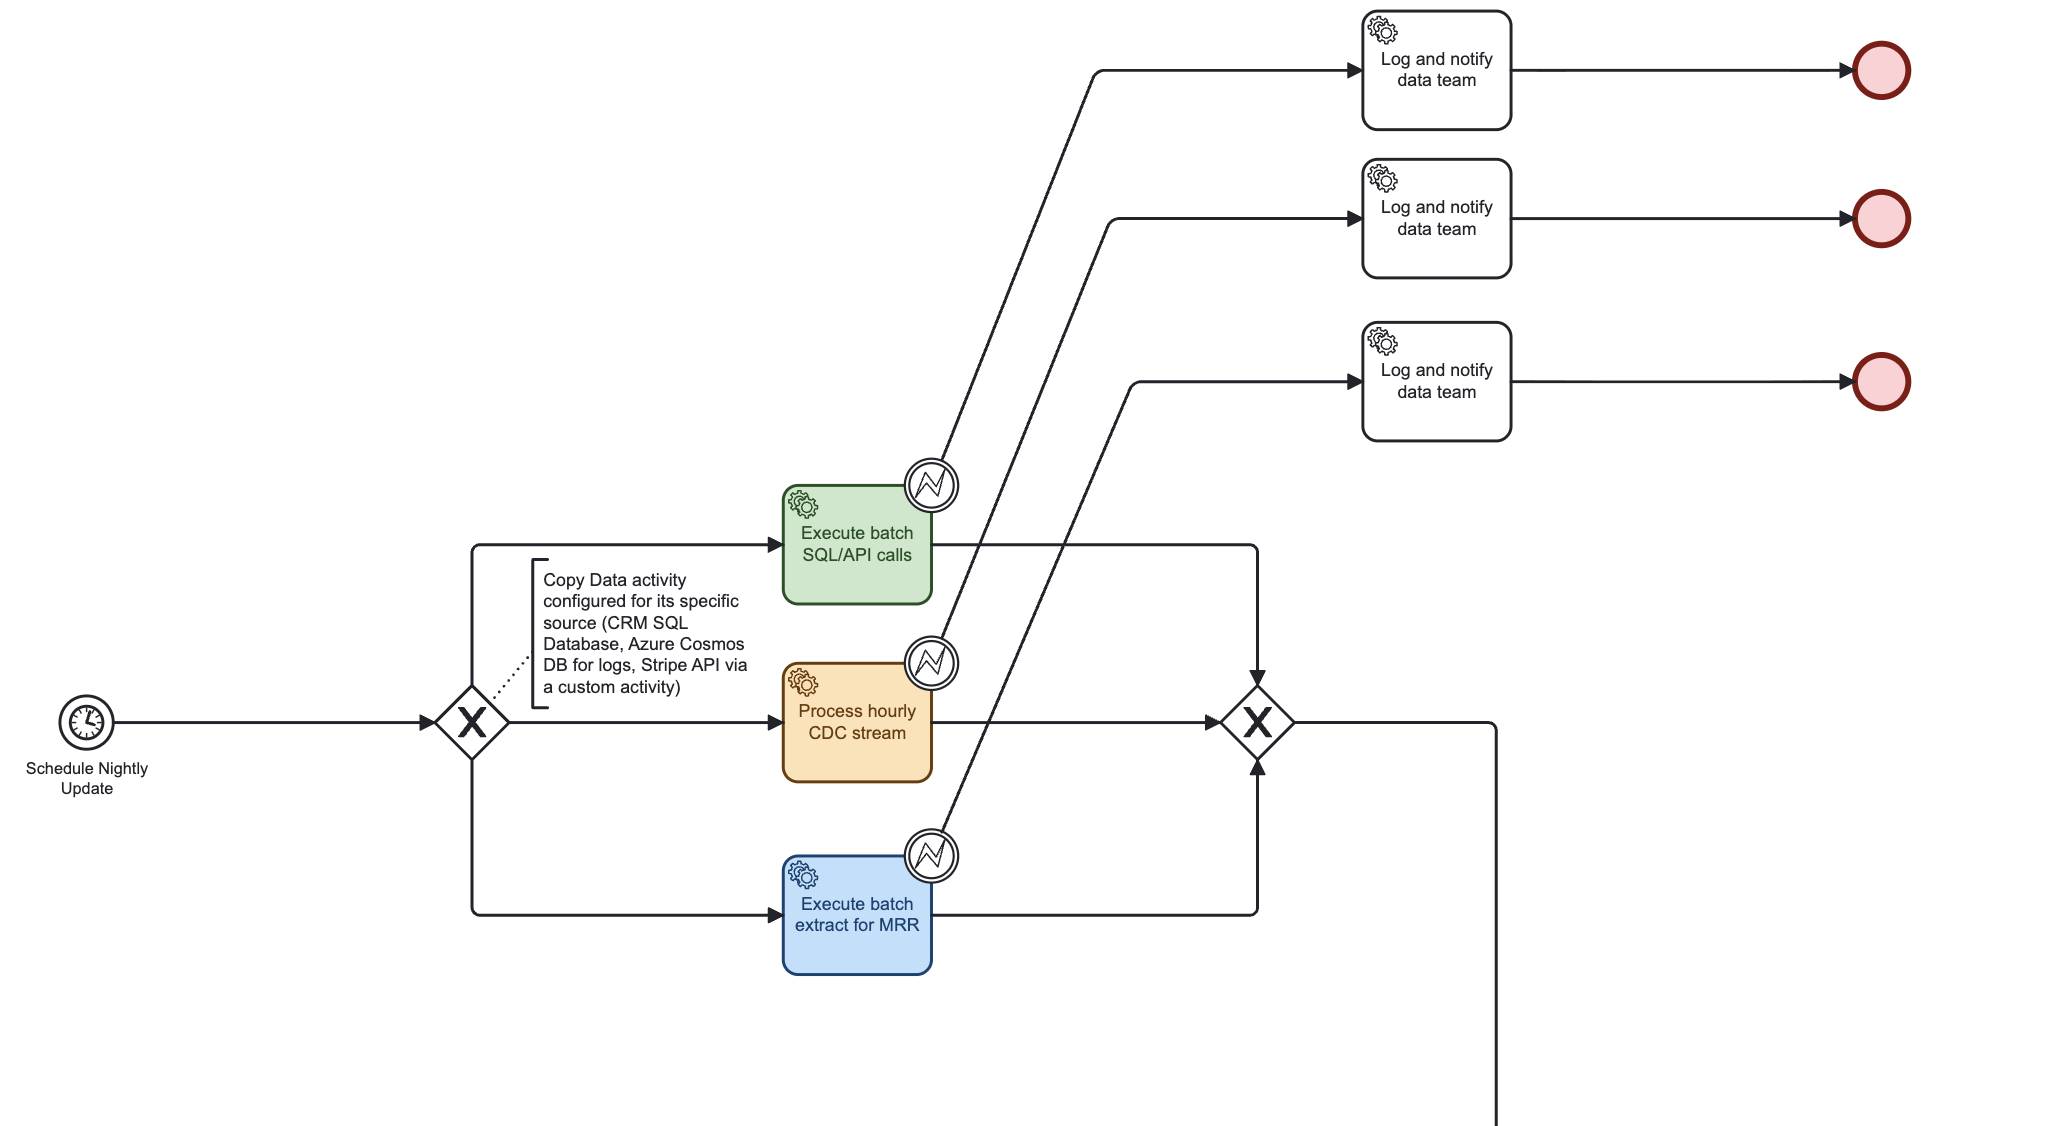

**Quality & Consistency**


> Once we have successfully extracted the data from multiple sources, we should adopt a dataflow activity in which performs cleaning service tasks on the raw data to check for inconsistencies, missing values or outliers.


**Schema Enforcement**


> Next, given we have multiple disparate sources we often face the task of handling multiple conflicting formats, which is return does not give us a level of data integrity. Ensuring a unified schema at write guarantees that any new data is added to the tables if it has quality attributes aigned with the schema.



# Feature Engineering

**Temporal Features**


> Derived from the time component of cognitive events.



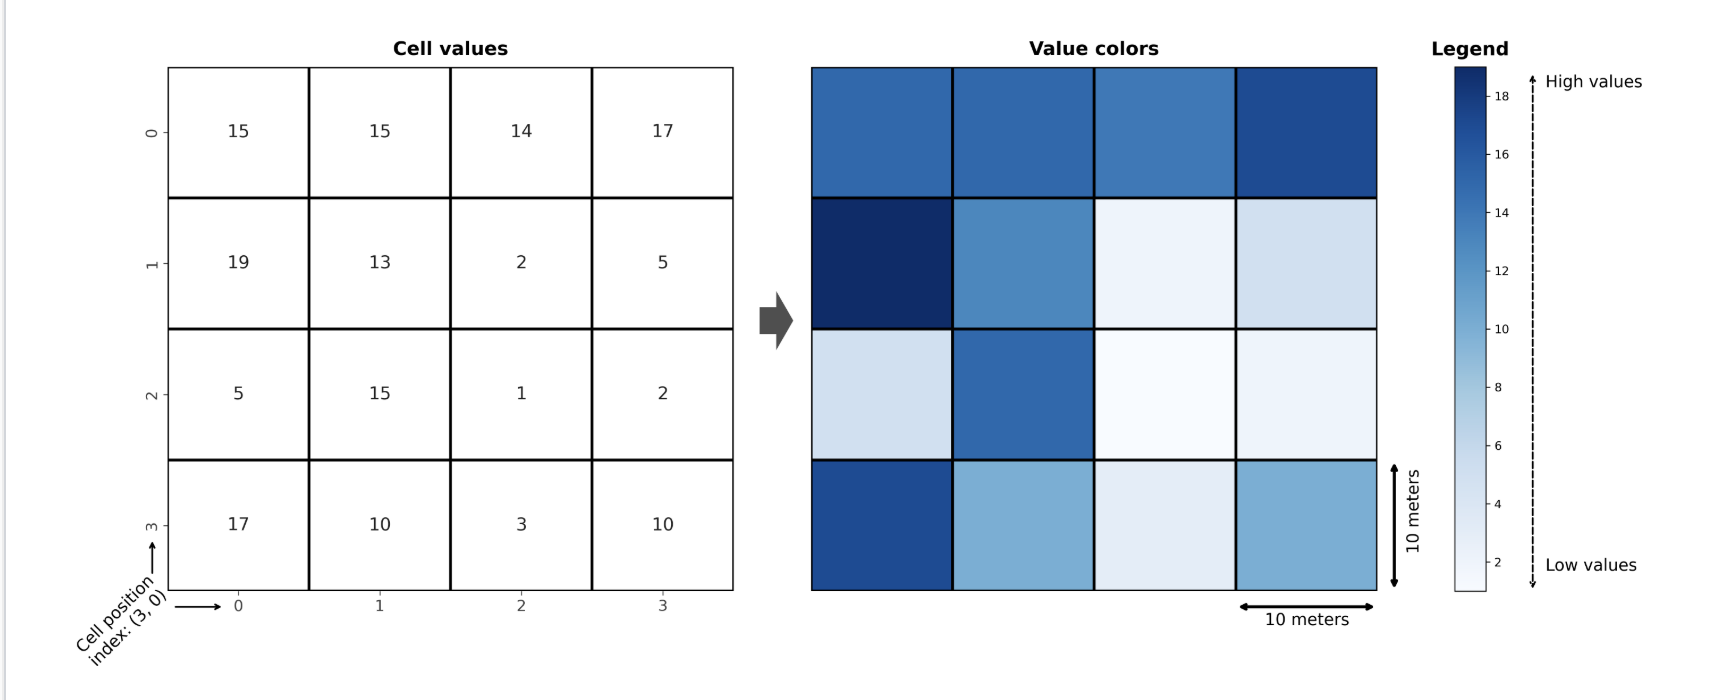